<a href="https://colab.research.google.com/github/ckarthik1610/Stock-Price-Prediction/blob/main/Stock_Price_Prediction_using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fetch historical stock data
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(stock_data.head())

# Create a new column for the next day's closing price
stock_data['Next_Close'] = stock_data['Close'].shift(-1)

# Drop the last row as it has no 'Next_Close' value
stock_data = stock_data[:-1]

# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stock_data[features]
y = stock_data['Next_Close']

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876106  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167610  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742653  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400543  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565208  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2.263284041356188
Root Mean Squared Error (RMSE): 3.044968970156352


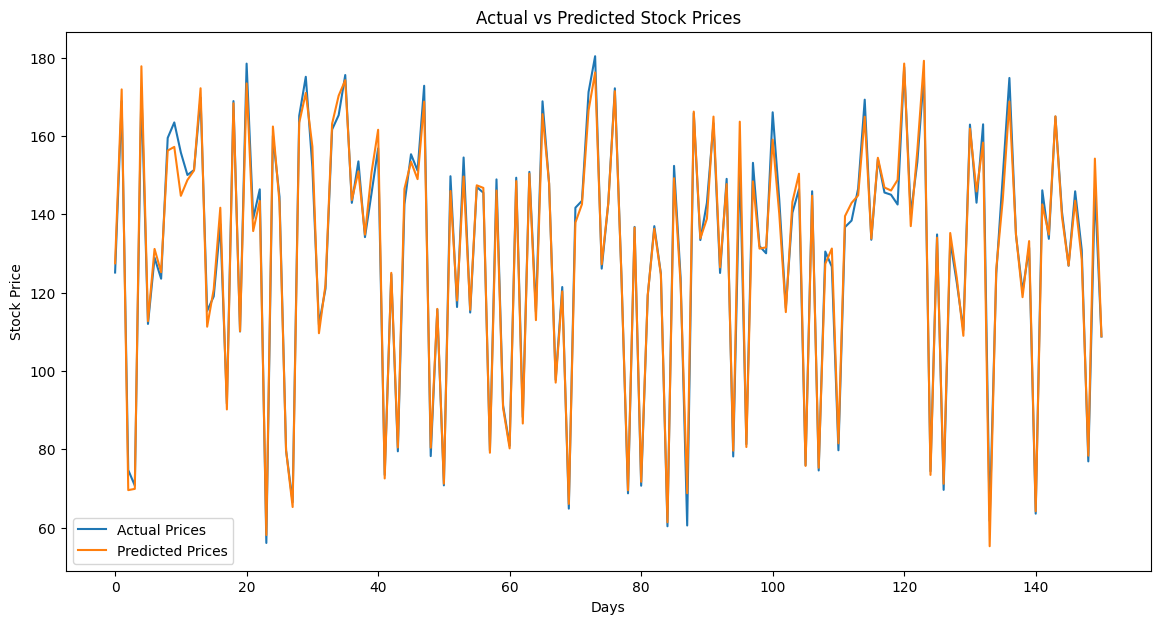

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [9]:
ticker = 'Tatamotors.NS'
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(stock_data.head())

# Create a new column for the next day's closing price
stock_data['Next_Close'] = stock_data['Close'].shift(-1)

# Drop the last row as it has no 'Next_Close' value
stock_data = stock_data[:-1]

# Features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stock_data[features]
y = stock_data['Next_Close']

model.fit(X, y)

# Prepare the latest data for next day prediction
latest_data = stock_data[features].iloc[-1].values.reshape(1, -1)

# Predict the stock price for the next day
next_day_prediction = model.predict(latest_data)
print(f'Predicted stock price for the next day: {next_day_prediction[0]}')

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS   
Date                                                                  
2020-01-01 00:00:00+00:00    183.311234    184.449997    186.699997   
2020-01-02 00:00:00+00:00    192.553818    193.750000    194.699997   
2020-01-03 00:00:00+00:00    189.920181    191.100006    195.649994   
2020-01-06 00:00:00+00:00    184.503815    185.649994    191.000000   
2020-01-07 00:00:00+00:00    183.559677    184.699997    189.399994   

Price                               Low          Open        Volume  
Ticker                    TATAMOTORS.NS TATAMOTORS.NS TATAMOTORS.NS  
Date                                                                 
2020-01-01 00:00:00+00:00    183.600006    185.149994      25968357  
2020-01-02 00:00:00+00:00    184.600006    185.000000      57289863  
2020-01-03 00:00:00+00:00    189.250000    192.899994      47572728  
2020-01-06 